<a href="https://colab.research.google.com/github/KarinImitola/ProyectoDeep/blob/main/03_Modelo_modificado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Paso 1**


Habilitar y probar la GPU, comprobar si Tensorflow puede conectarse a la GPU

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Sat Nov 18 02:16:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Paso 2**


Se conecta Colab con Drive para que haga de unidad de almacenamiento y carga de archivos

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


se crea la carpeta custom_data en Google Drive la cual contendrá las siguientes carpetas y rutas .


1. **custom_data/images**
2. **custom_data/custom.names**
3. **custom_data/train.txt**
4. **custom_data/test.txt**
5. **custom_data/backup**
6. **custom_data/detector.data**
7. **custom_data/cfg**

# **Paso 3**
Crear directorio de imagenes ya que se entrena un modelo pare reconocer botellas de plastico, se reunen las imagenes y la anotaciones en la carpeta ***custom data/images***, en ella se incluyen tanto las imagenes de train o como de test, al igual que los labels de cada una.

Para hacerlo se carga una carpeta con las imagenes comprimidas tanto de test y train la cual es nombrada como ***zip*** la cual es descomprimida en el carpeta ***images***

In [ ]:
!unzip "/content/gdrive/MyDrive/custom_data/zip/images.zip" -d "/content/gdrive/MyDrive/custom_data"

Archive:  /content/gdrive/MyDrive/custom_data/zip/images.zip
replace /content/gdrive/MyDrive/custom_data/images/000000_jpg.rf.f416949b457c7f6bf1e5d3fb2b9c047f.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# **Paso 4**
Crear carpeta Custom.names, donde se incluyen las etiquetas de los objetos, esta es ubicada en ***custom_data/custom.names*** en la cual cada línea corresponde a un tipo de objeto

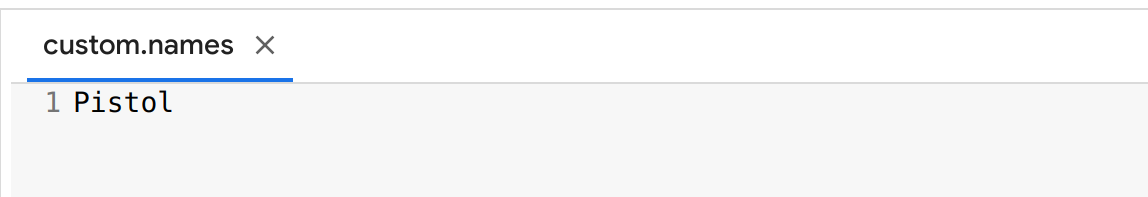

# **Paso 5**
Se crear anchivos el dipo ***.txt***, el primero con las rutas de las imagenes que seran utilizadas en el entrenamiento y el segundo con las que seran utilizadas para el test. los cuales son ubicados en las rutas:

**custom data/train.txt**

**custom data/test.txt**

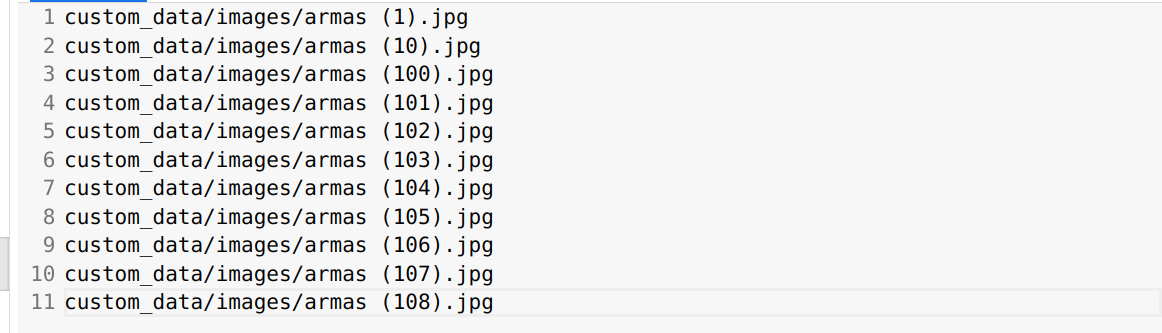

# **Paso 6**
Se crea una carpeta llamada "backup" en la dirreccion ***/content/gdrive/MyDrive/custom_data/backup***

# **Paso 7**
En la carpeta ***custom_data*** se crea un archivo "detector.data" que contiene los detalles de las clases que se consideraran, la ruta de los archivos donde se especifican cuáles son de entrenamiento y cuáles de test, la ruta de la carpeta de backup y la ruta del archivo con el nombre de las clases

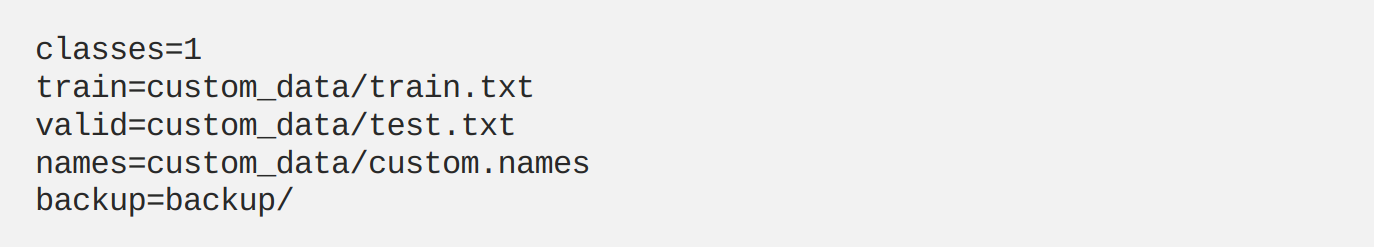

# **Paso 8**
Clonar directorio darknet


In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Counting objects: 100% (294/294), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 15833 (delta 157), reused 222 (delta 140), pack-reused 15539
Receiving objects: 100% (15833/15833), 14.75 MiB | 12.94 MiB/s, done.
Resolving deltas: 100% (10587/10587), done.


Cambiar el directorio de trabajo actual a Darknet

In [ ]:

%cd darknet

/content/darknet


### Change makefile to have GPU and OPENCV enabled, and other parameters for faster computation.

In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [ ]:
# Make file
"/content/darknet/Makefile"

'/content/darknet/Makefile'

### Compilar modelo

In [ ]:
# compiling the model
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: wa

# **Paso 9**
Se hacen realizan cambios en la configuración de YOLO, se elige el fichero de la configuración YOLOv3 según la necesidad de nuestro entrenamiento, se utiliza el **custom data/cfg/yolov3.cfg**

# **Paso 10**
*Descargar pesos pre-entrenados* Los pesos pre-entrenados están disponibles  https://pjreddie.com/media/files/darknet53.conv.74

In [ ]:
# Download weights darknet model 53
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2023-11-18 02:20:15--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  57.8MB/s    in 2.7s    

2023-11-18 02:20:18 (57.8 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# **Paso 11**
*Entrenar modelo*

In [ ]:
!./darknet detector train /content/gdrive/MyDrive/custom_data/detector.data /content/gdrive/MyDrive/custom_data/cfg/yolov3.cfg darknet53.conv.74 -dont_show

Se han truncado las últimas 5000 líneas del flujo de salida.
 total_bbox = 22033, rewritten_bbox = 14.963918 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.487436), count: 7, class_loss = 25.524010, iou_loss = 2.343300, total_loss = 27.867310 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 31.881882, iou_loss = 0.000000, total_loss = 31.881882 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 24.935564, iou_loss = 0.000000, total_loss = 24.935564 
 total_bbox = 22040, rewritten_bbox = 14.959166 % 

 Tensor Cores are disabled until the first 3000 iterations are reached.
150/2000: loss=34.6 hours left=3.3
 150: 34.646099, 77.594086 avg loss, 0.000001 rate, 4.721178 seconds, 9600 images, 3.289812 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 149.82 MB 
 CUDA allocate 

Continúa el entrenamiento desde donde ha quedado, en caso de alguna interrupción indeseada

In [ ]:
import
!./darknet detector train /content/gdrive/MyDrive/custom_data/detector.data /content/gdrive/MyDrive/custom_data/cfg/yolov3.cfg /content/gdrive/MyDrive/custom_data/backup//yolov3_final.weights -dont_show

SyntaxError: ignored

# **Paso 12**
Calculando la Precisión Media de los Pesos Específicos alcanzados hasta el momento en el entrenamiento.

In [ ]:
!./darknet detector map /content/gdrive/MyDrive/custom_data/detector.data /content/gdrive/MyDrive/custom_data/cfg/yolov3.cfg /content/gdrive/MyDrive/custom_data/backup/yolov3_last.weights -dont_show

 CUDA-version: 11080 (12000), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   1 ->  416 x 416 x  32 0.100 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.59